In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fileDownloaded = drive.CreateFile({'id':'1a-sTBUhBEP-nIcLlxDJWGs0nmfAjS3Dl'})
fileDownloaded2 = drive.CreateFile({'id':'1MeEWzUMXOv_be1W0XLf-pqhM_tHAvNuH'})
fileDownloaded.GetContentFile('pulsars_test_set')
fileDownloaded2.GetContentFile('pulsars_train_set')

In [ ]:
df1 = pd.read_csv('pulsars_test_set')
df1.tail(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
12633,106.875000,47.571328,0.199440,0.284964,3.079431,20.984455,8.427475,78.259366,0
12634,133.820312,43.478161,0.136691,0.353121,0.982441,9.486068,18.528395,444.411748,0
12635,98.726562,50.407823,0.565124,0.245231,0.570234,9.011285,22.018589,561.833787,0
12636,126.625000,55.721826,0.002946,-0.303218,0.534281,8.588882,23.913761,660.197035,0
12637,143.671875,45.302647,-0.045769,0.353643,5.173913,26.462345,5.706651,33.802613,0
12638,118.484375,50.608483,-0.029059,-0.027494,0.422241,8.086684,27.446113,830.638550,0
12639,96.000000,44.193113,0.388674,0.281344,1.871237,15.833746,9.634927,104.821623,0
12640,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
12641,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
12642,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


In [ ]:
df2 = pd.read_csv('pulsars_train_set')
df2.tail()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
5250,89.453125,35.848827,0.731656,3.101474,1.450669,14.204964,11.203558,142.473878,0
5251,127.070312,47.663564,0.006552,-0.123634,0.853679,11.197206,16.122702,296.507738,0
5252,121.375000,53.245158,0.103772,-0.365119,1.095318,12.239976,16.258042,303.880023,0
5253,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
5254,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [ ]:
x_train = df1.drop(["target_class"], axis=1)
x_train2=df1.drop(["target_class",], axis=1)
x_test = df2.drop(["target_class",], axis=1)
x_test2=df2.drop(["target_class",], axis=1)
y_train = df1["target_class"].values
y_test = df2["target_class"].values

In [ ]:
c=[]
for i in range(len(y_test)):
  if y_test[i]==1 :
    c.append(i)

In [ ]:
from sklearn.preprocessing import StandardScaler
from  sklearn.decomposition import PCA

# Scalling data
stdSc = MaxAbsScaler()
featureVector = stdSc.fit_transform(x_train)

# pca clustering
pca = PCA(n_components = 2)
pca.fit(featureVector)
featureVectorT = pca.transform(x_train)

In [ ]:
x_test = stdSc.fit_transform(x_test)
x_test2 = pca.transform(x_test)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train2, y_valid = train_test_split(featureVector,y_train, test_size = 0.1, random_state = 42,)

print (x_train.shape, y_train2.shape, x_valid.shape, y_valid.shape)

(11378, 8) (11378,) (1265, 8) (1265,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train2, x_valid2, y_train3, y_valid2 = train_test_split(featureVectorT,y_train, test_size = 0.1, random_state = 42,)

print (x_train.shape, y_train3.shape, x_valid.shape, y_valid.shape)

(11378, 8) (11378,) (1265, 8) (1265,)


In [ ]:
import tensorflow as tf
tf.random.set_seed(1234)
np.random.seed(42)

inp1 = tf.keras.layers.Input(shape = ((x_train.shape[1], )), name = 'inp1')
inp2 = tf.keras.layers.Input(shape = ((x_train2.shape[1], )), name = 'inp2')
D1 = tf.keras.layers.Dense(10, activation = 'relu')(inp1)
D2 = tf.keras.layers.Dropout(0.1)(D1)
D3 = tf.keras.layers.Dense(10, activation = 'relu')(inp2)
D4 = tf.keras.layers.Dropout(0.1)(D3)

D5 = tf.keras.layers.Dense(20, activation = 'relu')(D2)
D6 = tf.keras.layers.Dropout(0.2)(D5)
D7 = tf.keras.layers.Dense(20, activation = 'relu')(D4)
D8 = tf.keras.layers.Dropout(0.2)(D7)
ConcLayer = tf.keras.layers.concatenate([D6, D8])
D9 = tf.keras.layers.Dense(20, activation = 'relu')(ConcLayer)
D10 = tf.keras.layers.Dropout(0.2)(D9)
D11 = tf.keras.layers.Dense(20, activation = 'relu')(D10)
D12 = tf.keras.layers.Dropout(0.2)(D11)
D13 = tf.keras.layers.Dense(10, activation = 'relu')(D12)
D14 = tf.keras.layers.Dropout(0.01)(D13)
D15 = tf.keras.layers.Dense(10, activation = 'swish')(D14)
D16 = tf.keras.layers.Dropout(0.1)(D15)


#D7 = tf.keras.layers.Dropout(0.07)(D6)
output = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'opt')(D16)

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience =5, restore_best_weights = True,monitor='loss')

Model = tf.keras.Model(inputs = [inp1, inp2], outputs = [output])
Model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy', tf.keras.metrics.AUC()])
Model.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inp1 (InputLayer)               [(None, 8)]          0                                            
__________________________________________________________________________________________________
inp2 (InputLayer)               [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_68 (Dense)                (None, 10)           90          inp1[0][0]                       
__________________________________________________________________________________________________
dense_69 (Dense)                (None, 10)           30          inp2[0][0]                       
___________________________________________________________________________________________

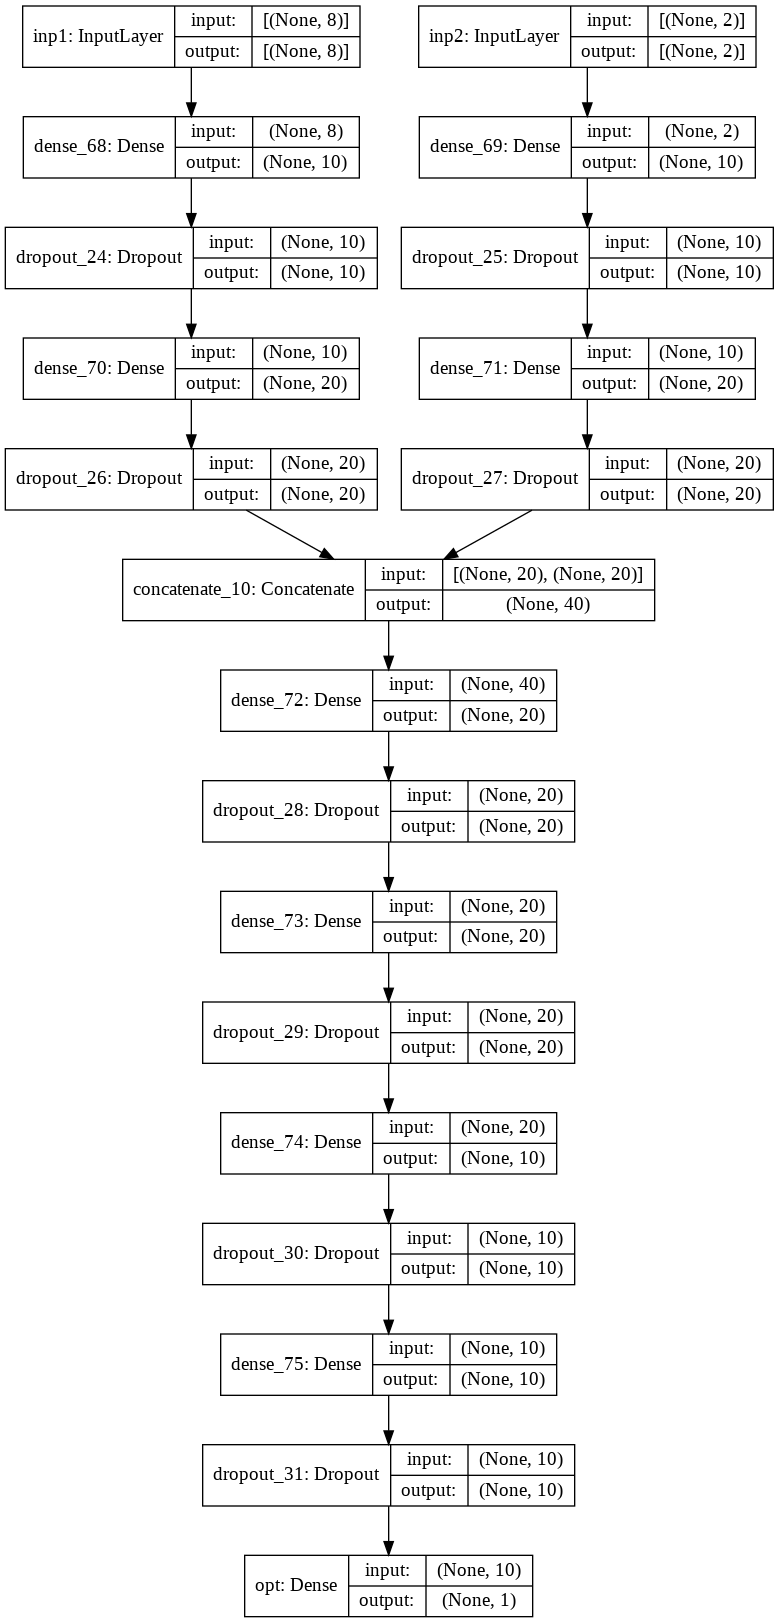

In [ ]:
import keras
keras.utils.plot_model(Model, "MultiHeadModel.png", show_shapes=True)

In [ ]:
history = Model.fit({'inp1' : x_train, 'inp2' : x_train2},  np.array(y_train2, dtype = 'int'), epochs = 500,callbacks = [early_stopping])

Epoch 1/500
356/356 [==============================] - 3s 6ms/step - loss: 0.6245 - accuracy: 0.7897 - auc_10: 0.5353
Epoch 2/500
356/356 [==============================] - 2s 5ms/step - loss: 0.2018 - accuracy: 0.9090 - auc_10: 0.9045
Epoch 3/500
356/356 [==============================] - 2s 5ms/step - loss: 0.1626 - accuracy: 0.9374 - auc_10: 0.9382
Epoch 4/500
356/356 [==============================] - 2s 6ms/step - loss: 0.1236 - accuracy: 0.9681 - auc_10: 0.9446
Epoch 5/500
356/356 [==============================] - 2s 6ms/step - loss: 0.1135 - accuracy: 0.9709 - auc_10: 0.9436
Epoch 6/500
356/356 [==============================] - 2s 6ms/step - loss: 0.1124 - accuracy: 0.9731 - auc_10: 0.9518
Epoch 7/500
356/356 [==============================] - 2s 5ms/step - loss: 0.1030 - accuracy: 0.9719 - auc_10: 0.9583
Epoch 8/500
356/356 [==============================] - 2s 6ms/step - loss: 0.1021 - accuracy: 0.9716 - auc_10: 0.9571
Epoch 9/500
356/356 [==============================] - 2

In [ ]:
y_pred=Model.predict([x_test,x_test2], batch_size=10,verbose=1)

526/526 [==============================] - 1s 2ms/step


In [ ]:
y_pred = (y_pred > 0.4).astype(np.float32)

In [ ]:
z=[]
for j in range(0,len(y_pred)):
  if y_pred[j]==1 :
    z.append(j)

In [ ]:
print(c)
print(z)

[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 157, 158, 159, 160, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240

KeyError: ignored

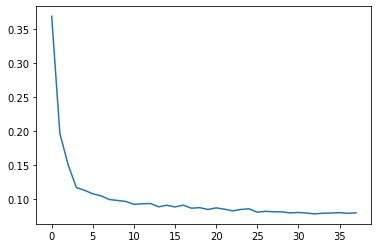

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('‘Model Loss’')
plt.ylabel('‘Losss’')
plt.xlabel('‘Epochs’')
plt.yscale("log")
plt.legend(['‘train’', '‘test’'])
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test,y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[ 407   66]
 [  35 4747]]
